# 1-D ADVECTION PROBLEM

## This is a Jupyter Notebook plotting simulation output generated with Mara3 (https://github.com/jzrake/Mara3). The simulation evolves a 1-D Gaussian wave pulse with periodic boundary conditions. 
## This problem explores numerical diffusion in Mara3 and convergence at high resolutions.

## First import all needed python modules:

In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

## Fix the plotting settings with matplotlib

In [2]:
# Plotting settings
mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times']})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
plt.rcParams.update({'grid.alpha': 0.5})
mpl.rcParams['font.size'] = 25

## Below plot the propagation of the Gaussian wave pulse for various resolutions (in list 'resolutions'). Observe how the diffusion (broadening of the pulse) decreases as resolution is increased.

/Users/magda/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


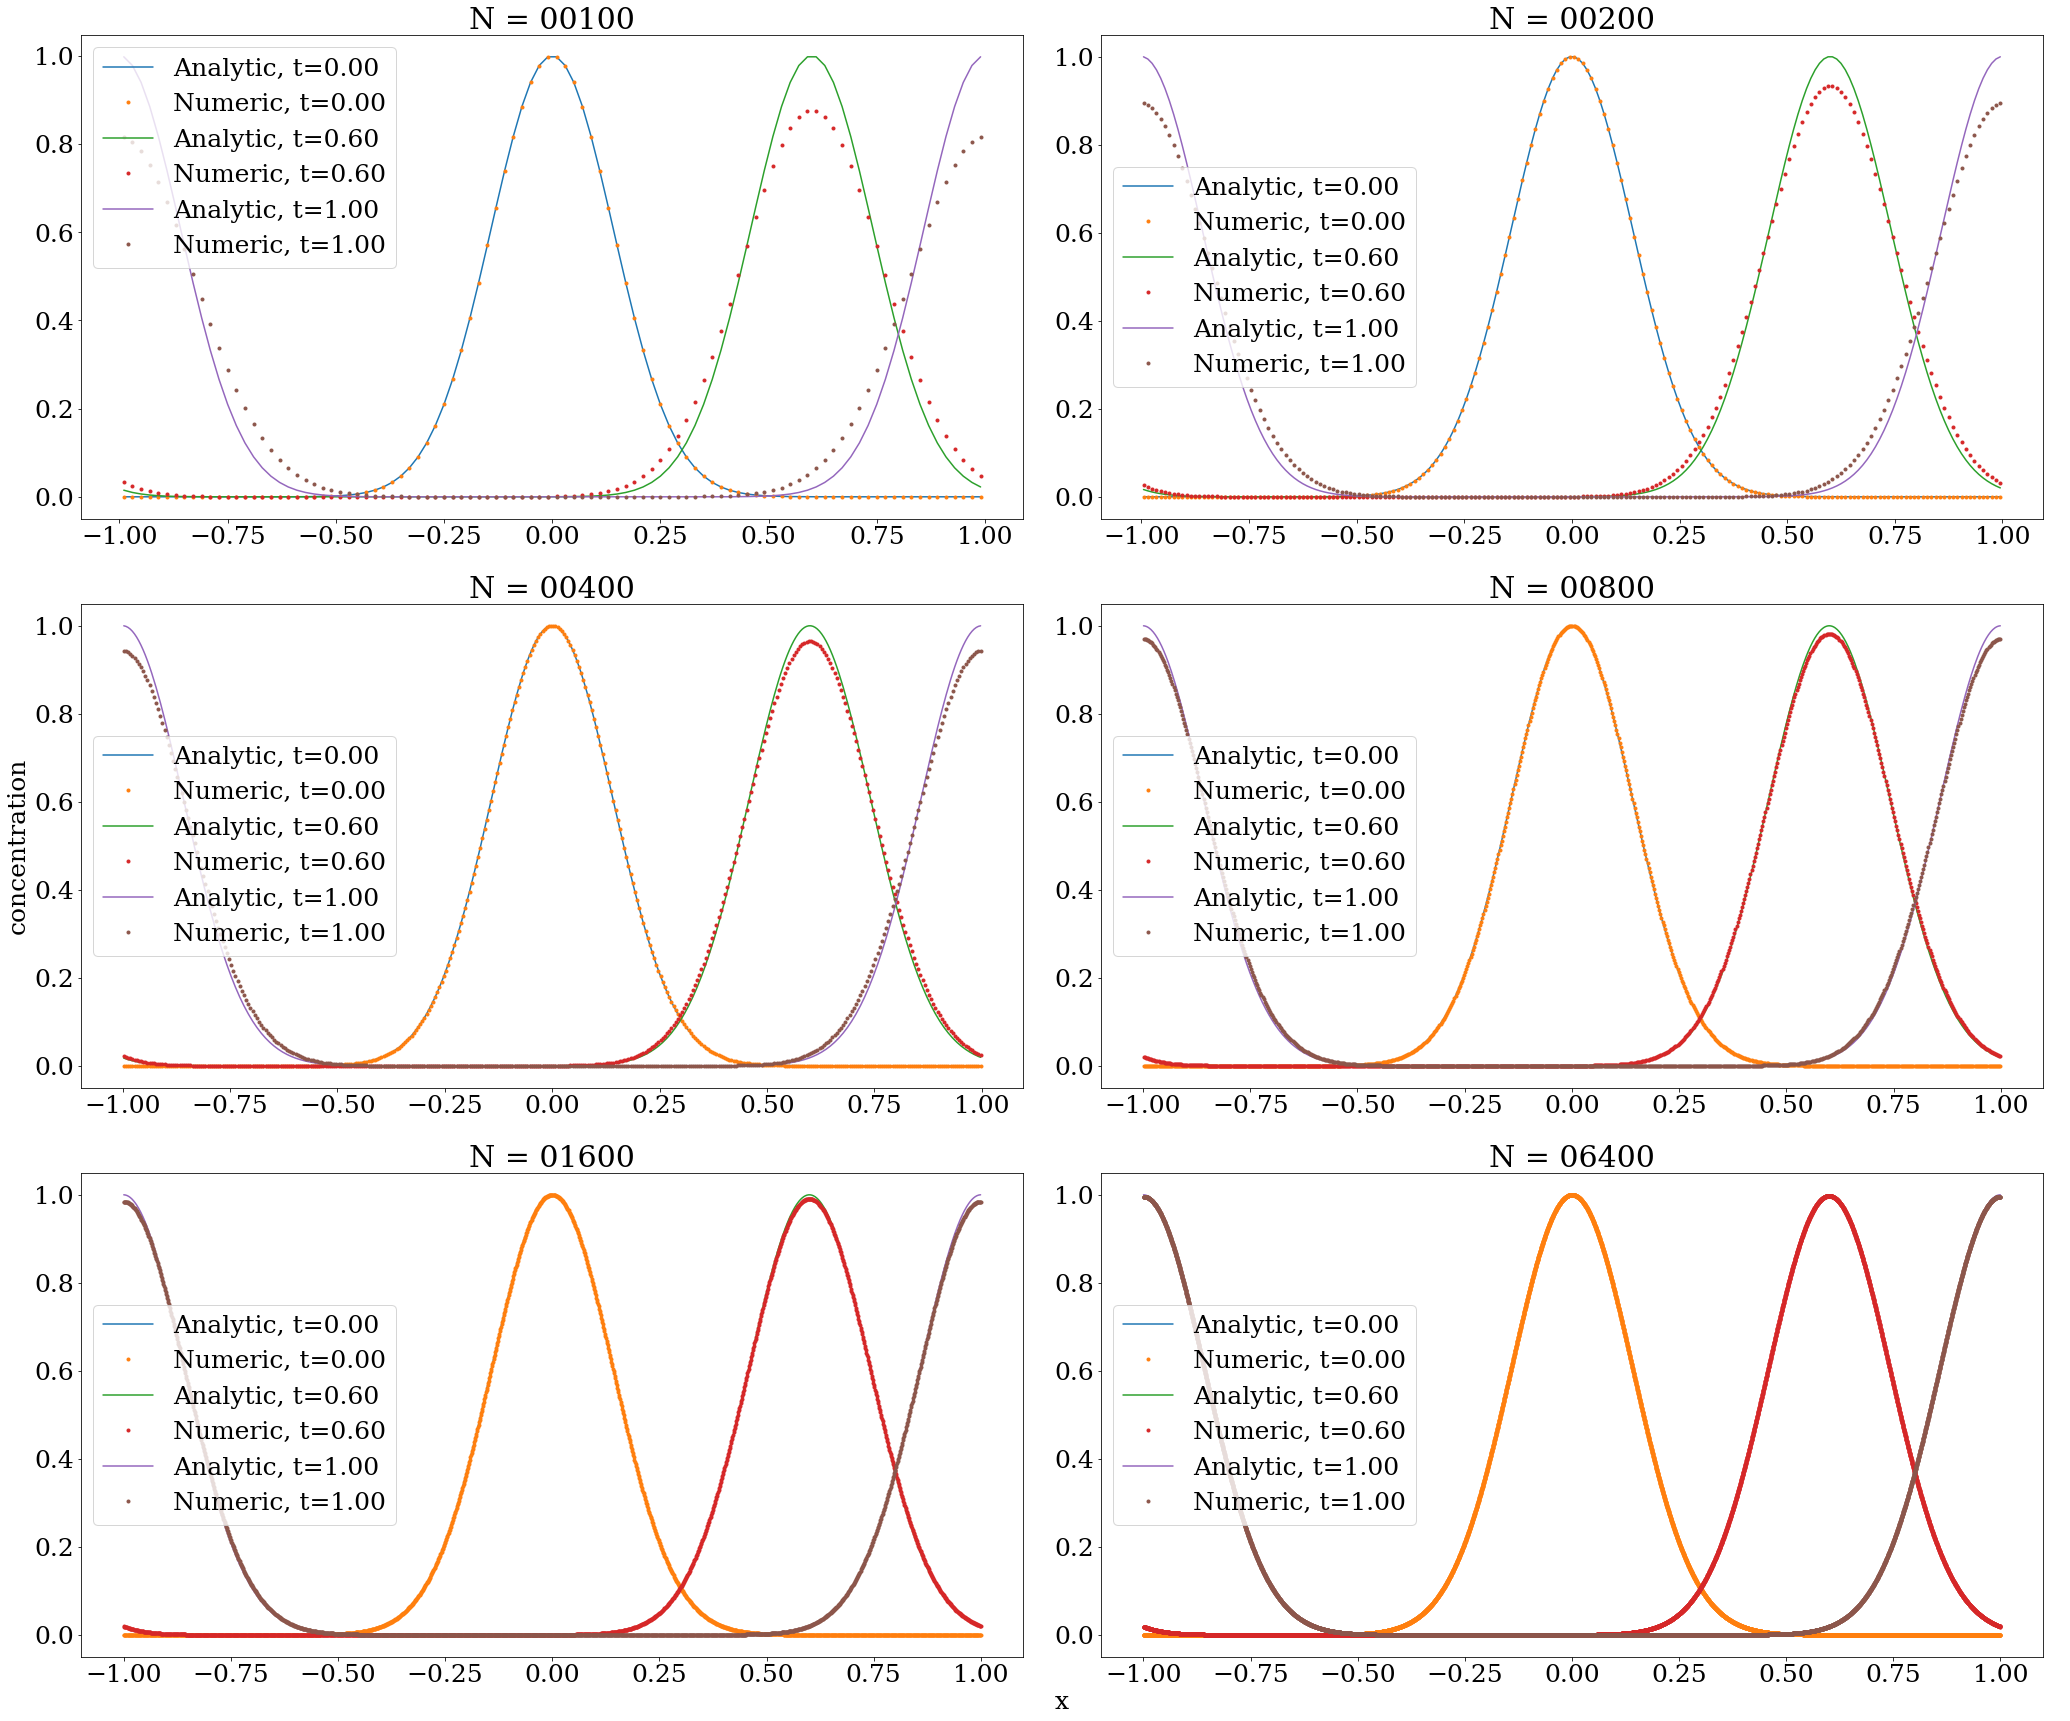

In [19]:
resolutions = [100,200,400,800,1600,6400]

fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(111) 
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

sigma=0.2
a = 1.
def true_solution(x,t,a=1.,sigma=0.2):
    displaced_x = x + a * t
    new_x = []
    for xi in displaced_x:
        if xi < -1:
            new_x.append(xi+2)
        if xi >= 1:
            new_x.append(xi-2)
        if (xi < 1) & (xi > -1):
            new_x.append(xi)
    sort_ind = np.argsort(new_x)
    new_x = np.array(new_x)[sort_ind] 
    gaussian = (np.exp(-(x) * (x) / sigma / sigma))[sort_ind]
            
    return (new_x,gaussian)
                        

n=1
for res in resolutions:
    fig.add_subplot(int(np.ceil(len(resolutions)/2.)),2,n)
    n+=1
    for i in [0,2,4]:
        f = h5py.File('vary_resolution/res_%05d/diagnostics.%04d.h5' %(res,i), 'r')

        t=f['t']
        x=f['x'][...]
        u=f['u'][...]
        
        x2,gaussian= true_solution(x,t[...])
              
        plt.title("N = %05d" %res)
        plt.plot(x2,gaussian, label = "Analytic, t=%.2f" %t[...])
        plt.plot(x,u,'o', markersize='3',label = "Numeric, t=%.2f" %t[...])
        plt.legend()
        
# Set common labels
ax.set_xlabel('x')
ax.set_ylabel('concentration')
plt.tight_layout()

plt.savefig('diffused_gaussian.png')


## Now investigate the amount of diffusion by calculating $L^2$:

## $$ L^2 = \sum_{i}{(f(x_i) - g(x_i))^2 \times dx_i} $$

## Where $f(x_i)$ is the numerical wave pulse propagated with Mara3, $g(x_i)$ is the period Gaussian and $dx_i$ is the cell size. The below script evaluates $L^2$ for a range of resolutions to check at which resolution numerical diffusion becomes negligible.

### To change the time at which to evaluate $L^2$, adjust the integer value for parameter i. 

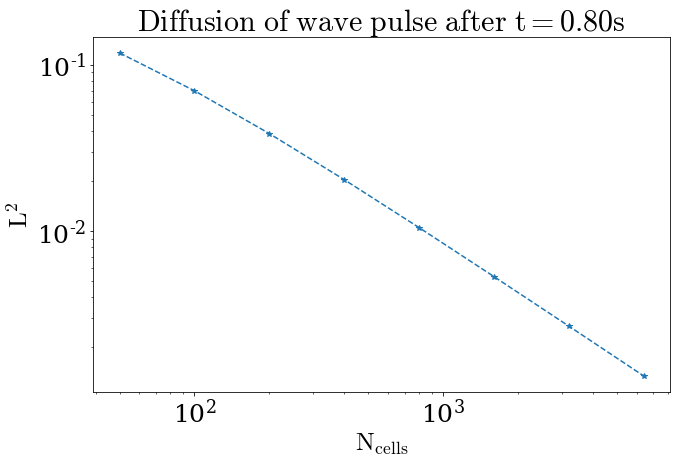

In [35]:
fig = plt.figure(figsize=(10,7))
'''ax = fig.add_subplot(111) 
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')'''

L2 = []
resolution = []
n = 0
i=3
while n < 8:
    res = 50*2**n
    f = h5py.File('vary_resolution/res_%05d/diagnostics.%04d.h5' %(res,i), 'r')
    L2.append(f['L2'][...])
    resolution.append(res)
    n+=1

plt.title(r'$ \rm Diffusion \ of \ wave \ pulse \ after \ t=%.2f s$' %f['t'][...])
plt.loglog(resolution,L2, '*', linestyle='--')
plt.xlabel(r'$\rm N_{\rm cells}$')
plt.ylabel(r'$\rm L^2$')
plt.tight_layout()

plt.savefig('L2_resolution_t=%.2f.png' %f['t'][...])
